# Notebook: Netflix_stock_Price_Prediction.ipynb

#### Project Members:  Semyon Lomasov, Ruslan Gokhman, Aayush Bhetuwal, Siddanta K C, Ovadia Sutton


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/SiddantaK/cryptocurrency/master/NFLX.csv')

In [ ]:
data = df.copy()

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


### Converting Date into Date format

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


### About Dataset
The Dataset contains data for 5 years ie. from 5th Feb 2018 to 5th Feb 2022

The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market.

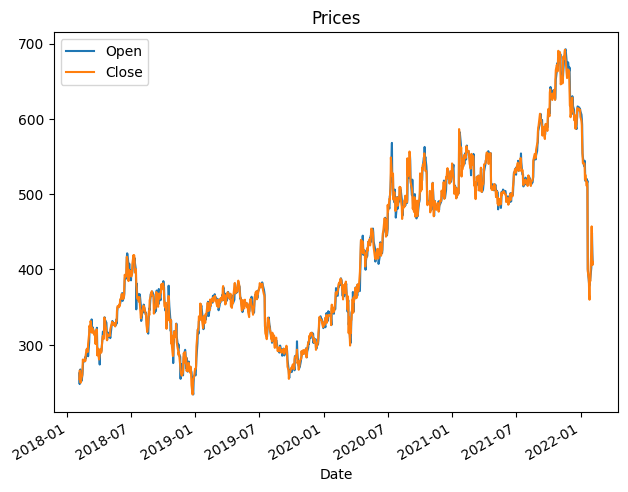

In [ ]:
df.plot(x='Date',y=['Open','Close'])
plt.tight_layout()
plt.xlabel("Date")
# plt.ylabel("Opening")
plt.title('Prices')
plt.show()

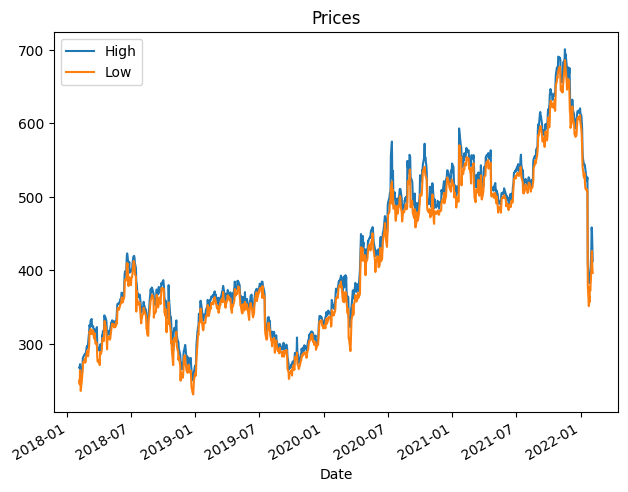

In [ ]:
df.plot(x='Date',y=['High','Low'])
plt.tight_layout()
plt.xlabel("Date")
# plt.ylabel("Opening")
plt.title('Prices')
plt.show()

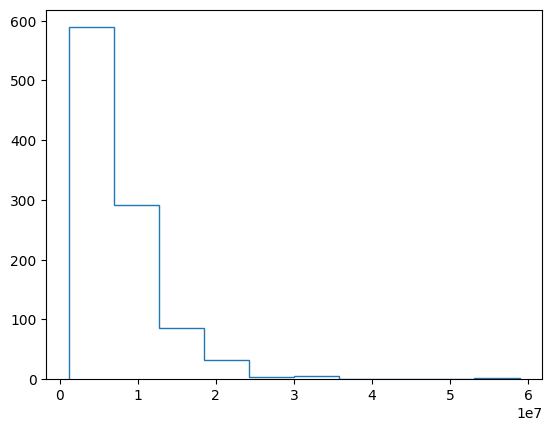

In [ ]:
counts, bins = np.histogram(df['Volume'])
plt.stairs(counts, bins)
# Histogram of 'Volume'

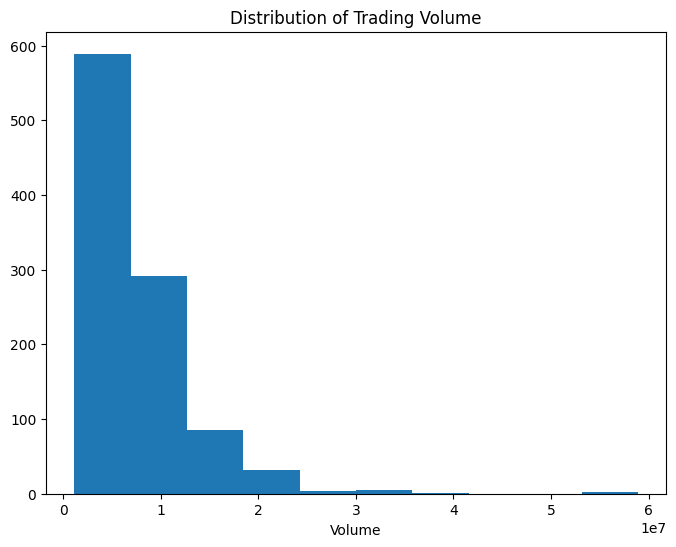

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Volume'],bins)
plt.xlabel('Volume')
plt.title('Distribution of Trading Volume')
plt.show()

<ipython-input-13-adc746111fbb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


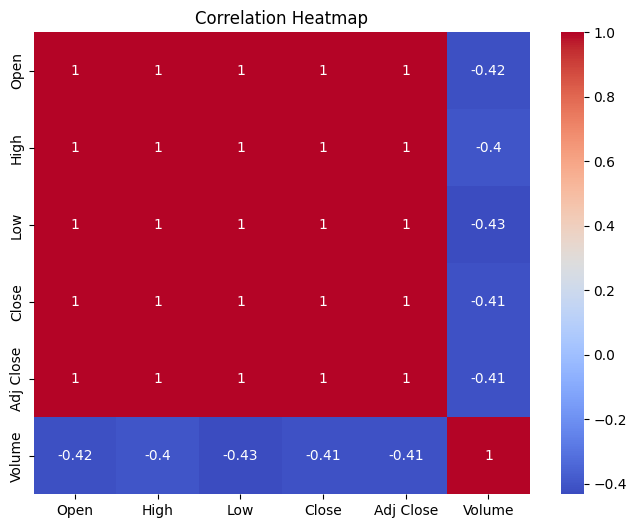

In [ ]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## By Year

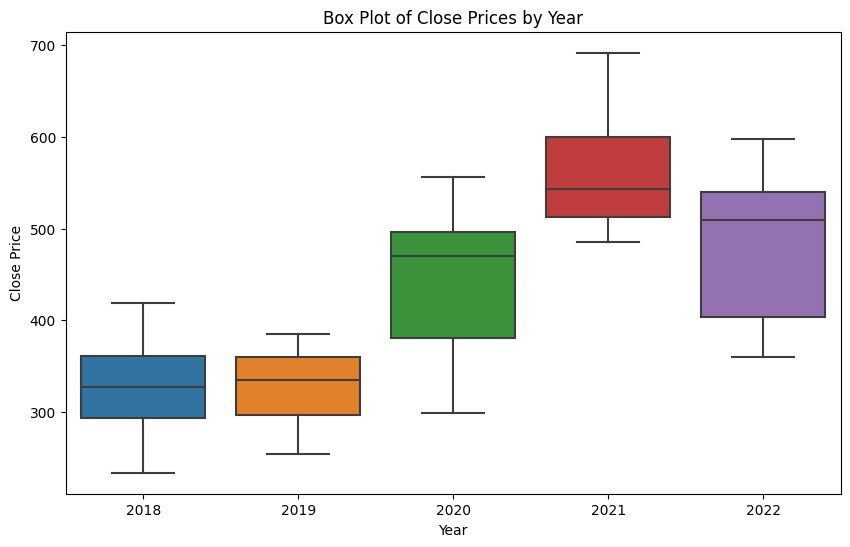

In [ ]:
# Box plot for 'Close' prices by category (e.g., year, month)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Date'].dt.year, y=df['Close'])
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Box Plot of Close Prices by Year')
plt.show()


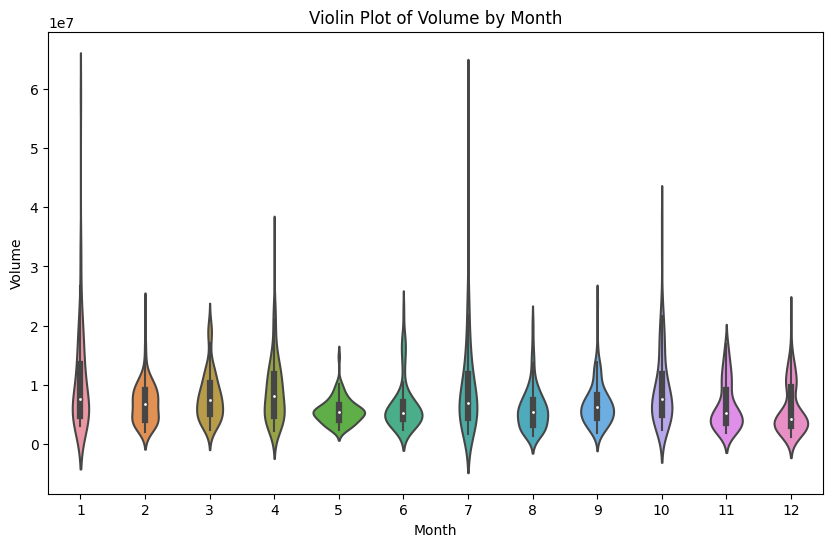

In [ ]:
# Violin plot for 'Volume' by category
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Date'].dt.month, y=df['Volume'])
plt.xlabel('Month')
plt.ylabel('Volume')
plt.title('Violin Plot of Volume by Month')
plt.show()

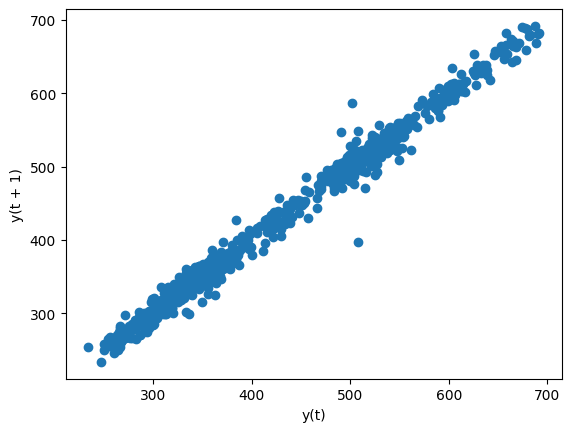

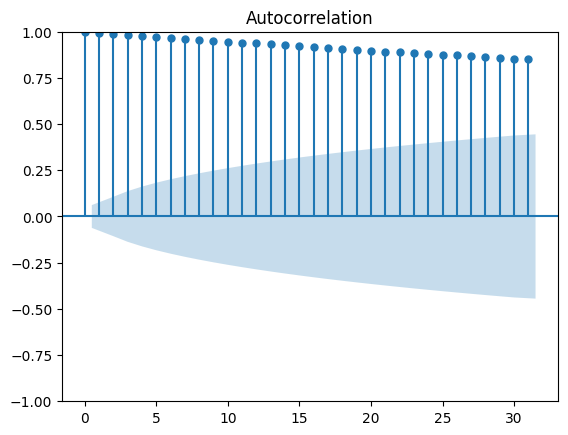

In [ ]:
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

# Lag plot
lag_plot(df['Close'])
plt.show()

# Autocorrelation plot
plot_acf(df['Close'])
plt.show()

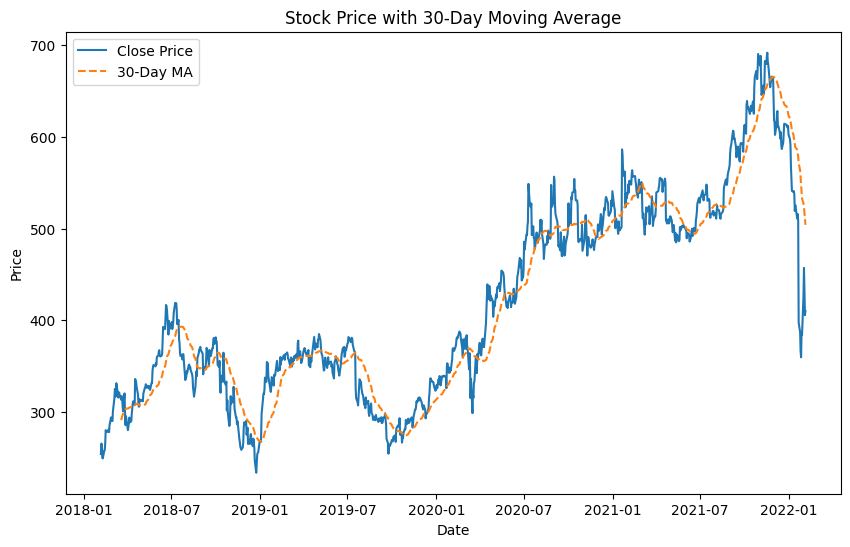

In [ ]:
# Calculate and plot a 30-day moving average
df['30-Day MA'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['30-Day MA'], label='30-Day MA', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with 30-Day Moving Average')
plt.legend()
plt.show()

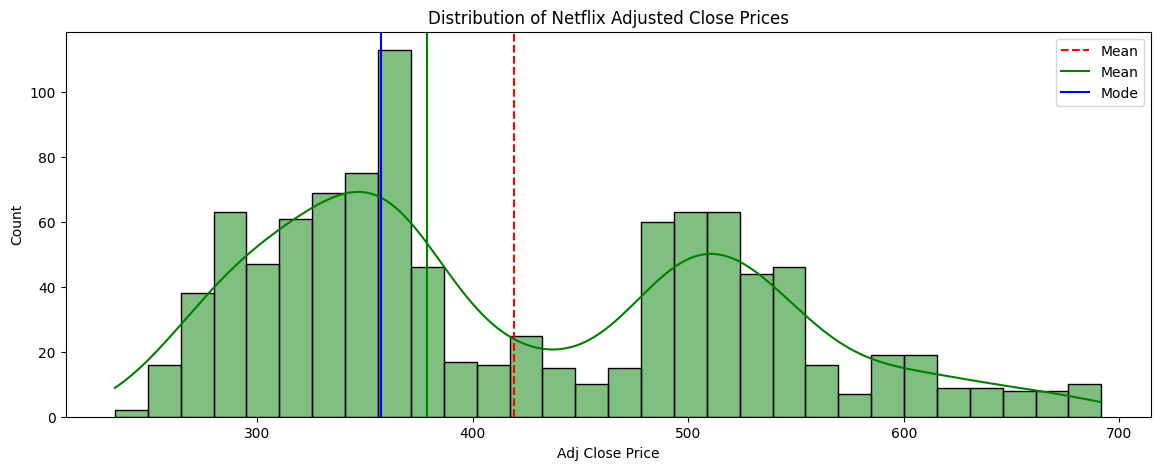

In [ ]:
# Distribution Plot for 'Adj Close'
f, (ax1) = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(df['Adj Close'], bins=30, kde=True, color='green')
mean=df["Close"].mean()
median=df["Close"].median()
mode=df["Close"].mode().values[0]
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Mean")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")
ax1.legend()
plt.xlabel('Adj Close Price')
plt.title('Distribution of Netflix Adjusted Close Prices')
plt.show()

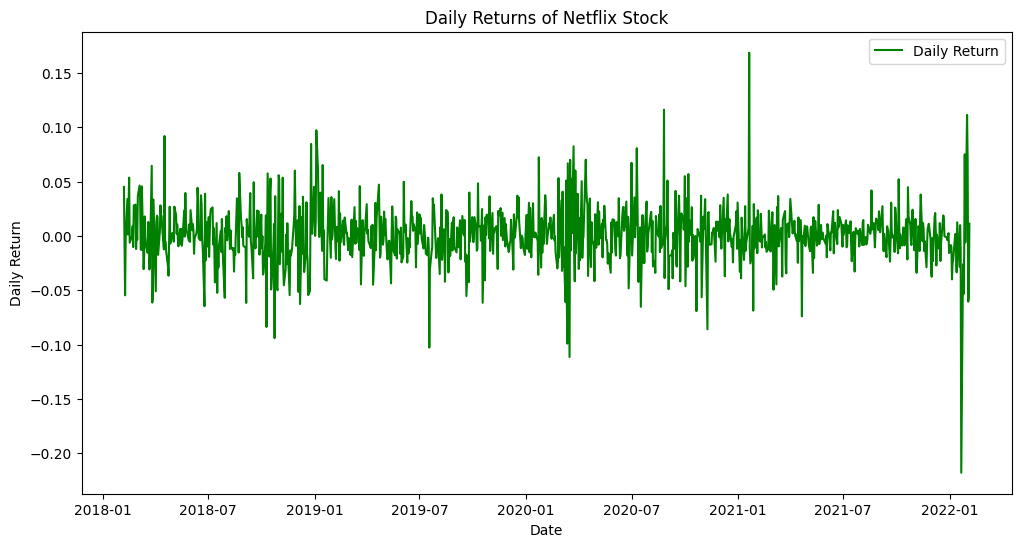

In [ ]:
# Daily Returns Calculation
df['Daily Return'] = df['Adj Close'].pct_change()

# Daily Returns Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily Return'], label='Daily Return', color='green')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Returns of Netflix Stock')
plt.legend()
plt.show()

### Best Day of Stock

In [ ]:
df[df['Daily Return']==df['Daily Return'].max()]['Daily Return']

744    0.168543
Name: Daily Return, dtype: float64

### Worst day of Stock

In [ ]:
df[df['Daily Return']==df['Daily Return'].min()]['Daily Return']

998   -0.217905
Name: Daily Return, dtype: float64

### To understand Close Vs Adj Close
Example:
Suppose you have a stock with the following historical prices:

On Day 1, the "Close" price is 100.
On Day 2, the company issues a 2-for-1 stock split.
On Day 3, the "Close" price is 60.
In this case, the "Close" prices would show a dramatic drop from 100 to 60, which might not accurately represent the stock's true performance. However, the "Adj Close" prices would be adjusted to reflect the stock split. After the adjustment, the "Adj Close" on Day 1 would be 50 (100 divided by 2), and on Day 3, it would also be 50. This adjustment provides a more consistent view of the stock's performance, accounting for the stock split.

The key takeaway is that "Close" represents the raw, unadjusted closing price of a stock, while "Adj Close" is adjusted to account for corporate actions and other factors, providing a more accurate and consistent historical price for long-term analysis and comparisons.

In [ ]:
df[df['Close'] == df['Adj Close']].shape

(1009, 9)

In [ ]:
df.shape

(1009, 9)

<ipython-input-24-1d63edd78eac>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


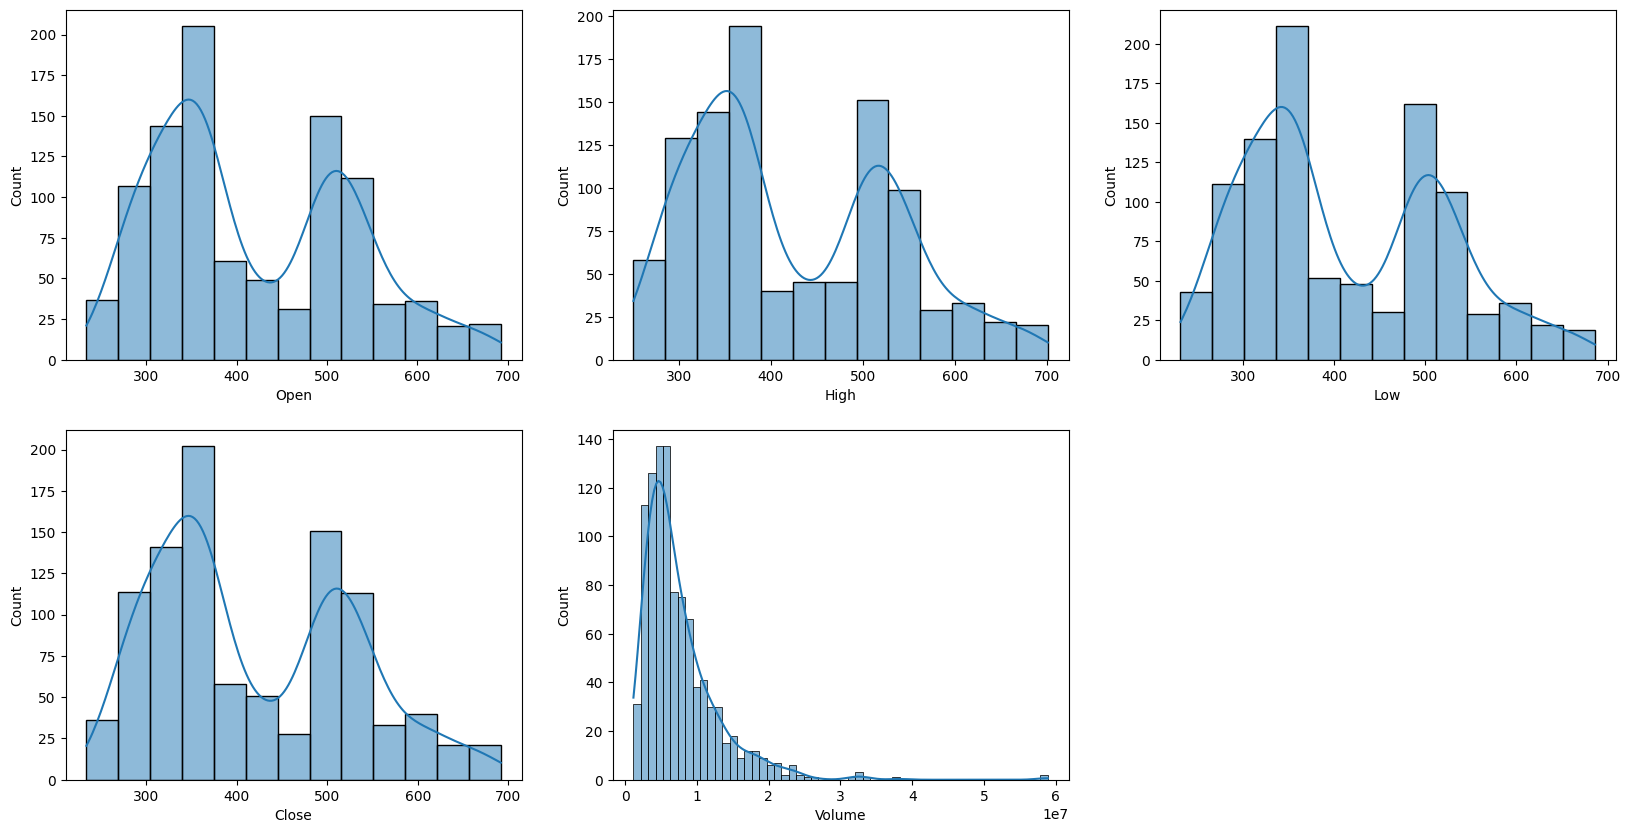

In [ ]:

features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.histplot(df[col],kde=True)
plt.show()

We can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

In [ ]:
from scipy import stats
# Calculate mean, median, and mode
# Calculate mean, median, and mode
data = df['Close']
mean = np.mean(data)
median = np.median(data)
mode_result = df["Close"].mode().values[0]

# Determine skewness based on mean, median, and mode
if mode_result < median < mean:
    skewness = "Left-Skewed (Negatively Skewed)"
elif mean < median < mode_result.mode:
    skewness = "Right-Skewed (Positively Skewed)"
else:
    skewness = "Symmetrical (No Skew)"

# Print the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode_result}")  # Access the mode from the result object
print(f"Skewness: {skewness}")


Mean: 419.0007329207136
Median: 378.670013
Mode: 357.320007
Skewness: Left-Skewed (Negatively Skewed)


In [ ]:
splitted = df['Date'].dt.strftime('%Y/%m/%d').str.split('/', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,30-Day MA,Daily Return,day,month,year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN,NaN,5,2,2018
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,NaN,0.045072,6,2,2018
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,NaN,-0.004366,7,2,2018
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,NaN,-0.054657,8,2,2018
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,NaN,-0.002519,9,2,2018


<ipython-input-27-a7407cc6ae98>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = df.groupby('year').mean()
<ipython-input-27-a7407cc6ae98>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


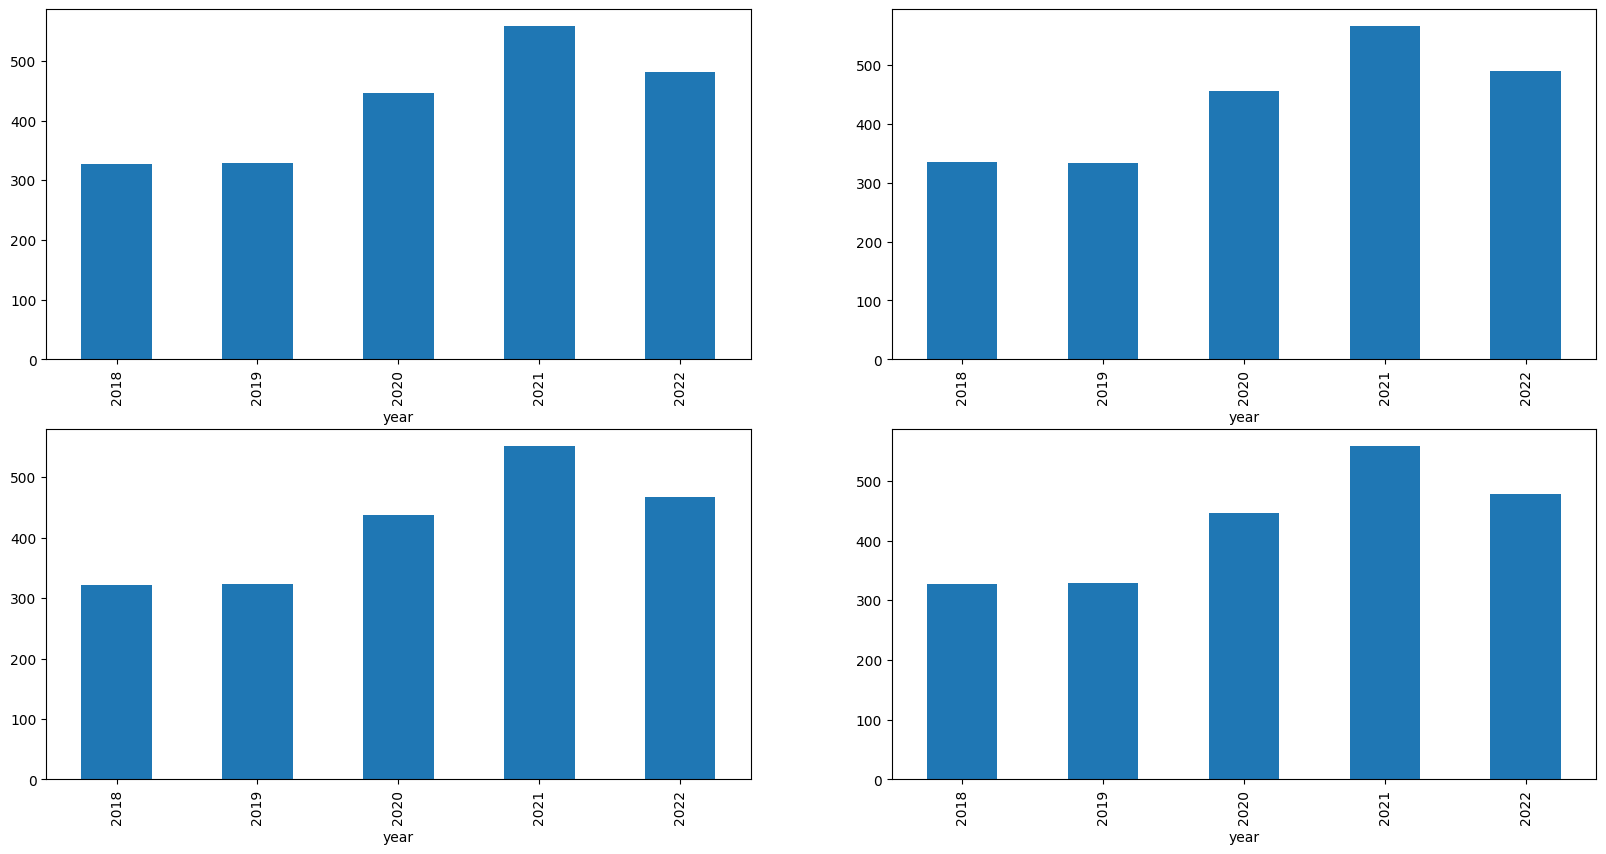

In [ ]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

# Data preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Define X and y

In [ ]:
X=[]
y=[]

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
data_scaled = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))


In [ ]:
for i in range(70,len(df)):
  X.append(data_scaled[i-70:i])
  y.append(data_scaled[i])

In [ ]:
len(X)

939

In [ ]:
len(y)

939

In [ ]:
X=np.array(X).reshape(len(X),70,1)
y=np.array(y)


In [ ]:
X.shape

(939, 70, 1)

In [ ]:
y.shape

(939, 1)

In [ ]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.25)


# Simple RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
# Create a Sequential model
model = Sequential()

# Add a SimpleRNN layer with 64 units
model.add(SimpleRNN(units=64, activation='tanh', input_shape=(70, 1)))

# Add a Dense layer for the output
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='nadam',loss='mean_squared_error')

In [ ]:
history=model.fit(X_train,y_train,epochs=30,batch_size=32,validation_data=(X_test,y_test))


Epoch 1/30
22/22 [==============================] - 10s 29ms/step - loss: 0.0075 - val_loss: 0.0034
Epoch 2/30
22/22 [==============================] - 0s 20ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 3/30
22/22 [==============================] - 0s 18ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 4/30
22/22 [==============================] - 0s 19ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 5/30
22/22 [==============================] - 0s 19ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 6/30
22/22 [==============================] - 0s 19ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 7/30
22/22 [==============================] - 0s 19ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 8/30
22/22 [==============================] - 0s 19ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 9/30
22/22 [==============================] - 0s 19ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 10/30
22/22 [==============================] - 0s 19ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 11

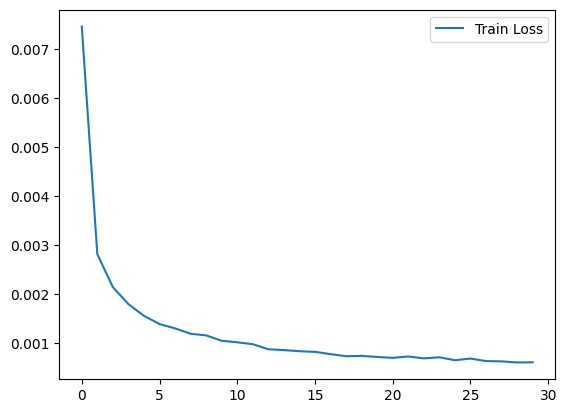

In [ ]:
plt.plot(history.history['loss'],label='Train Loss')
# plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

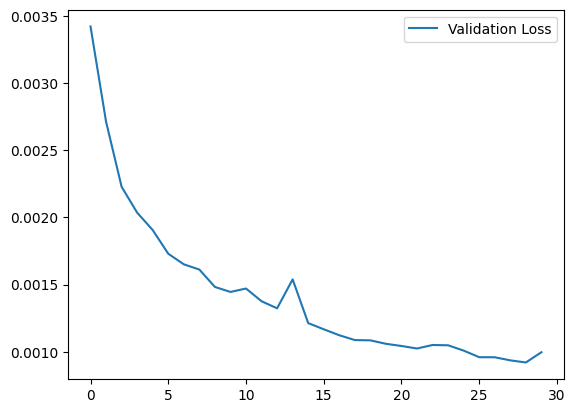

In [ ]:
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
def predic(Xtest,y_test_, r_model):
  y_pred = r_model.predict(Xtest)
  y_pred_optimal = []
  for k in y_pred:
    y_pred_optimal.append(k.flatten()[-1])
  y_test_=min_max_scaler.inverse_transform(y_test_)
  y_pred_optimal=min_max_scaler.inverse_transform(np.array(y_pred_optimal).reshape(-1,1) )
  r2=r2_score(y_test_,y_pred_optimal)
  return r2

In [ ]:
r2_simplernn = predic(X_test,y_test,model)
print(f'R^2 score on test value from Simple RNN model {r2_simplernn}')

8/8 [==============================] - 0s 14ms/step
R^2 score on test value from Simple RNN model 0.9799878993716036


# RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create a Sequential model
model = Sequential()

# Add a SimpleRNN layer with 64 units and 'tanh' activation
model.add(SimpleRNN(units=64, activation='tanh', return_sequences=True, input_shape=(70, 1)))

# Add a dropout layer for regularization
model.add(Dropout(0.2))

# Add another SimpleRNN layer with 32 units
model.add(SimpleRNN(units=32, activation='tanh', return_sequences=True))

# Add a dropout layer
model.add(Dropout(0.2))

# Add another SimpleRNN layer with 16 units
model.add(SimpleRNN(units=16, activation='tanh'))

# Add a Dense layer with 32 units and ReLU activation
model.add(Dense(units=32, activation='relu'))

# Add another Dense layer with 16 units and ReLU activation
model.add(Dense(units=16, activation='relu'))

# Add a Dense layer with 1 unit for the output and linear activation
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 70, 64)            4224      
                                                                 
 dropout (Dropout)           (None, 70, 64)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 70, 32)            3104      
                                                                 
 dropout_1 (Dropout)         (None, 70, 32)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 16)               

In [ ]:
history=model.fit(X_train,y_train,epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
22/22 [==============================] - 12s 141ms/step - loss: 0.0409 - mae: 0.1560 - val_loss: 0.0133 - val_mae: 0.0972
Epoch 2/30
22/22 [==============================] - 3s 125ms/step - loss: 0.0208 - mae: 0.1138 - val_loss: 0.0088 - val_mae: 0.0747
Epoch 3/30
22/22 [==============================] - 5s 224ms/step - loss: 0.0119 - mae: 0.0849 - val_loss: 0.0048 - val_mae: 0.0505
Epoch 4/30
22/22 [==============================] - 4s 191ms/step - loss: 0.0084 - mae: 0.0733 - val_loss: 0.0042 - val_mae: 0.0470
Epoch 5/30
22/22 [==============================] - 3s 121ms/step - loss: 0.0070 - mae: 0.0640 - val_loss: 0.0032 - val_mae: 0.0396
Epoch 6/30
22/22 [==============================] - 5s 231ms/step - loss: 0.0067 - mae: 0.0609 - val_loss: 0.0045 - val_mae: 0.0513
Epoch 7/30
22/22 [==============================] - 4s 185ms/step - loss: 0.0063 - mae: 0.0618 - val_loss: 0.0029 - val_mae: 0.0380
Epoch 8/30
22/22 [==============================] - 3s 131ms/step - loss: 0

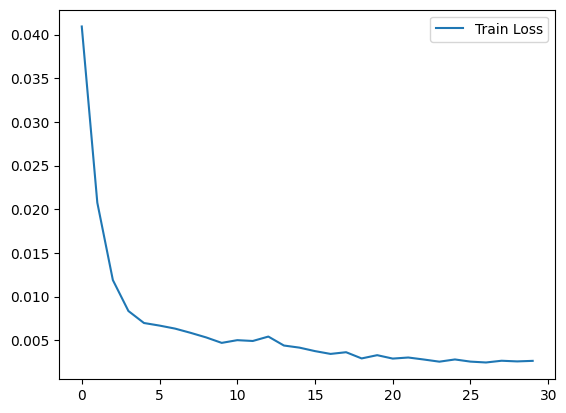

In [ ]:
plt.plot(history.history['loss'],label='Train Loss')
# plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

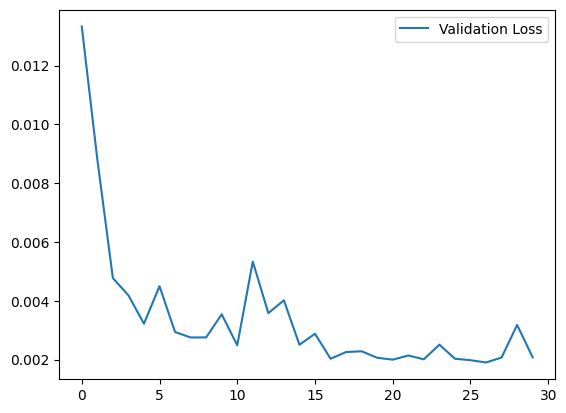

In [ ]:
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
r2_rnn = predic(X_test,y_test,model)
print(f'R^2 score on test value from RNN model {r2_rnn}')

R^2 score on test value from  RNN model 0.9583753787656217


# LSTM

In [ ]:
X.shape

(939, 70, 1)

In [ ]:
model=Sequential()
model.add(LSTM(units=120,return_sequences=True,input_shape=(70,1)) )
model.add(Dropout(0.2))
model.add(LSTM(units=70,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=20,return_sequences=True),)
model.add(Dropout(0.2))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=25, activation='relu'))

model.add(Dense(units=1))



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 70, 120)           58560     
                                                                 
 dropout_2 (Dropout)         (None, 70, 120)           0         
                                                                 
 lstm_1 (LSTM)               (None, 70, 70)            53480     
                                                                 
 dropout_3 (Dropout)         (None, 70, 70)            0         
                                                                 
 lstm_2 (LSTM)               (None, 70, 20)            7280      
                                                                 
 dropout_4 (Dropout)         (None, 70, 20)            0         
                                                                 
 dense_4 (Dense)             (None, 70, 100)          

In [ ]:
model.compile(optimizer='nadam',loss='mean_squared_error')

In [ ]:
from ipywidgets.widgets.widget_templates import validate
history=model.fit(X_train,y_train,epochs=30,batch_size=32,validation_data=(X_test,y_test))


Epoch 1/30
22/22 [==============================] - 11s 73ms/step - loss: 0.0890 - val_loss: 0.0252
Epoch 2/30
22/22 [==============================] - 0s 17ms/step - loss: 0.0235 - val_loss: 0.0180
Epoch 3/30
22/22 [==============================] - 0s 17ms/step - loss: 0.0185 - val_loss: 0.0169
Epoch 4/30
22/22 [==============================] - 0s 17ms/step - loss: 0.0163 - val_loss: 0.0171
Epoch 5/30
22/22 [==============================] - 0s 17ms/step - loss: 0.0153 - val_loss: 0.0143
Epoch 6/30
22/22 [==============================] - 0s 16ms/step - loss: 0.0145 - val_loss: 0.0149
Epoch 7/30
22/22 [==============================] - 0s 17ms/step - loss: 0.0142 - val_loss: 0.0153
Epoch 8/30
22/22 [==============================] - 0s 16ms/step - loss: 0.0137 - val_loss: 0.0136
Epoch 9/30
22/22 [==============================] - 0s 16ms/step - loss: 0.0135 - val_loss: 0.0125
Epoch 10/30
22/22 [==============================] - 0s 16ms/step - loss: 0.0136 - val_loss: 0.0134
Epoch 11

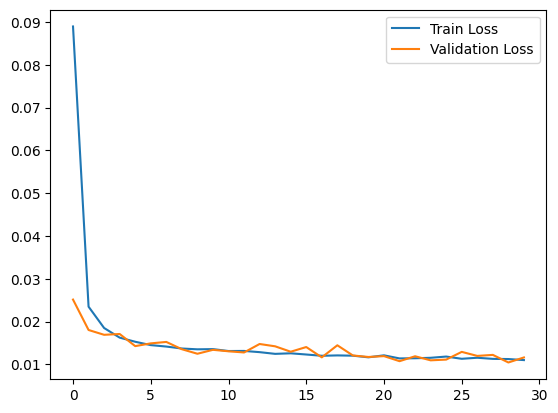

In [ ]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()


Check MSE on not mi

In [ ]:
# y_pred=model.predict(X_test)

In [ ]:
# y_pred_optimal=[]

In [ ]:
# for k in y_pred:
#   y_pred_optimal.append(k.flatten()[-1])


In [ ]:
# y_check=[]

In [ ]:
# y_check=y_test

In [ ]:
# y_test=min_max_scaler.inverse_transform(y_test)

In [ ]:
# y_pred_optimal=min_max_scaler.inverse_transform(np.array(y_pred_optimal).reshape(-1,1))

In [ ]:
# r2_lstm=r2_score(y_test,y_pred_optimal)

In [ ]:
# print(f'R^2 score on test value from LSTM model {r2_lstm}')

In [ ]:
r2 = predic(X_test,y_test,model)
print(f'R^2 score on test value from LSTM model {r2}')

8/8 [==============================] - 2s 11ms/step
R^2 score on test value from LSTM model 0.8735438328853719


# GRU Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add a GRU layer with 64 units and 'tanh' activation
model.add(GRU(units=64, activation='tanh', return_sequences=True, input_shape=(70, 1)))

# Add a dropout layer for regularization
model.add(Dropout(0.2))

# Add another GRU layer with 32 units
model.add(GRU(units=32, activation='tanh', return_sequences=True))

# Add a dropout layer
model.add(Dropout(0.2))

# Add another GRU layer with 16 units
model.add(GRU(units=16, activation='tanh'))

# Add a Dense layer with 32 units and ReLU activation
model.add(Dense(units=32, activation='relu'))

# Add another Dense layer with 16 units and ReLU activation
model.add(Dense(units=16, activation='relu'))

# Add a Dense layer with 1 unit for the output and linear activation
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 70, 64)            12864     
                                                                 
 dropout_5 (Dropout)         (None, 70, 64)            0         
                                                                 
 gru_1 (GRU)                 (None, 70, 32)            9408      
                                                                 
 dropout_6 (Dropout)         (None, 70, 32)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                2400      
                                                                 
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dense_9 (Dense)             (None, 16)               

In [ ]:
history=model.fit(X_train,y_train,epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
22/22 [==============================] - 6s 60ms/step - loss: 0.0719 - mae: 0.2048 - val_loss: 0.0119 - val_mae: 0.0889
Epoch 2/30
22/22 [==============================] - 0s 14ms/step - loss: 0.0117 - mae: 0.0843 - val_loss: 0.0036 - val_mae: 0.0450
Epoch 3/30
22/22 [==============================] - 0s 13ms/step - loss: 0.0039 - mae: 0.0461 - val_loss: 0.0029 - val_mae: 0.0403
Epoch 4/30
22/22 [==============================] - 0s 17ms/step - loss: 0.0031 - mae: 0.0415 - val_loss: 0.0023 - val_mae: 0.0344
Epoch 5/30
22/22 [==============================] - 0s 19ms/step - loss: 0.0027 - mae: 0.0383 - val_loss: 0.0023 - val_mae: 0.0345
Epoch 6/30
22/22 [==============================] - 0s 19ms/step - loss: 0.0028 - mae: 0.0392 - val_loss: 0.0023 - val_mae: 0.0340
Epoch 7/30
22/22 [==============================] - 0s 18ms/step - loss: 0.0025 - mae: 0.0367 - val_loss: 0.0023 - val_mae: 0.0339
Epoch 8/30
22/22 [==============================] - 0s 17ms/step - loss: 0.0025 - m

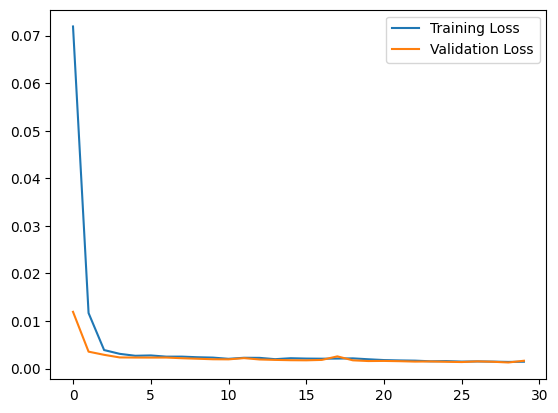

In [ ]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
r2_gru = predic(X_test,y_test,model)
print(f'R^2 score on test value from GRU model {r2_gru}')

8/8 [==============================] - 1s 6ms/step
R^2 score on test value from GRU model 0.9670824609692736


#CNN

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

In [ ]:
model_cnn = Sequential()

# Convolutional layer
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(70, 1)))
model_cnn.add(MaxPooling1D(pool_size=2))

# Flattening for Dense layer
model_cnn.add(Flatten())

# Dense Layers
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))


In [ ]:
# Compile the model
model_cnn.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Model summary
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 69, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 34, 64)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2176)              0         
                                                                 
 dense_11 (Dense)            (None, 50)                108850    
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 109093 (426.14 KB)
Trainable params: 109093 (426.14 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
# Training the model
history_cnn = model_cnn.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30
22/22 [==============================] - 6s 11ms/step - loss: 0.0244 - val_loss: 0.0079
Epoch 2/30
22/22 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0051
Epoch 3/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0055
Epoch 4/30
22/22 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 5/30
22/22 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 6/30
22/22 [==============================] - 0s 5ms/step - loss: 0.0027 - val_loss: 0.0037
Epoch 7/30
22/22 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 8/30
22/22 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 9/30
22/22 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 10/30
22/22 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 11/30
22/22 

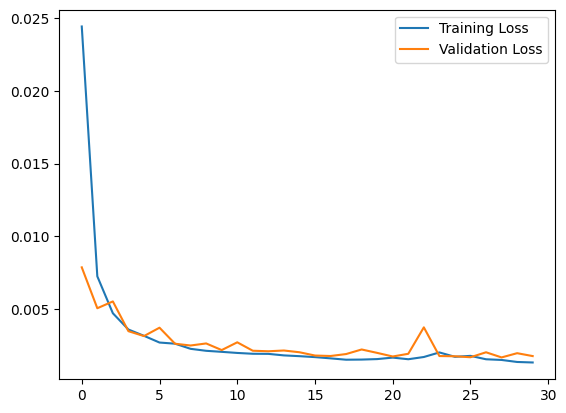

In [ ]:
# Plotting Loss
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluating the model
r2_cnn = predic(X_test, y_test, model_cnn)
print(f'R^2 score on test value from CNN model {r2_cnn}')

8/8 [==============================] - 0s 2ms/step
R^2 score on test value from CNN model 0.964044332768294


#BiDirectional LSTM

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:
# Bidirectional LSTM Model
model_bidir = Sequential()

# Adding Bidirectional LSTM layers
model_bidir.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(70, 1)))
model_bidir.add(Dropout(0.2))
model_bidir.add(Bidirectional(LSTM(32)))
model_bidir.add(Dropout(0.2))

# Dense layers for output
model_bidir.add(Dense(32, activation='relu'))
model_bidir.add(Dense(1))


In [ ]:
# Compile the model
model_bidir.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Model summary
model_bidir.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 70, 128)           33792     
 al)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 70, 128)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
# Training the model
history_bidir = model_bidir.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
22/22 [==============================] - 10s 87ms/step - loss: 0.0440 - val_loss: 0.0085
Epoch 2/30
22/22 [==============================] - 0s 17ms/step - loss: 0.0101 - val_loss: 0.0054
Epoch 3/30
22/22 [==============================] - 0s 17ms/step - loss: 0.0067 - val_loss: 0.0048
Epoch 4/30
22/22 [==============================] - 0s 18ms/step - loss: 0.0060 - val_loss: 0.0033
Epoch 5/30
22/22 [==============================] - 0s 16ms/step - loss: 0.0054 - val_loss: 0.0032
Epoch 6/30
22/22 [==============================] - 0s 16ms/step - loss: 0.0044 - val_loss: 0.0029
Epoch 7/30
22/22 [==============================] - 0s 17ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 8/30
22/22 [==============================] - 0s 17ms/step - loss: 0.0039 - val_loss: 0.0028
Epoch 9/30
22/22 [==============================] - 0s 17ms/step - loss: 0.0038 - val_loss: 0.0023
Epoch 10/30
22/22 [==============================] - 0s 17ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 11

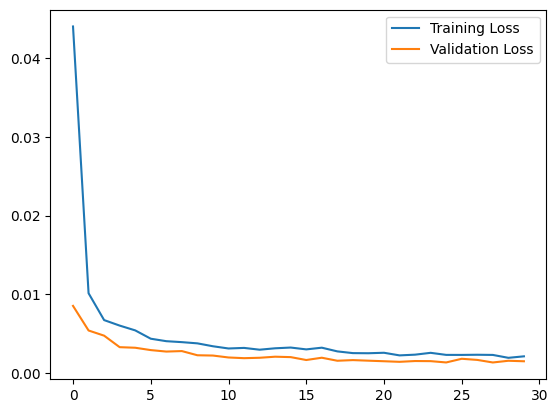

In [ ]:
# Plotting Loss
plt.plot(history_bidir.history['loss'], label='Training Loss')
plt.plot(history_bidir.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluating the model
r2_bidir = predic(X_test, y_test, model_bidir)
print(f'R^2 score on test value from Bidirectional LSTM model {r2_bidir}')

8/8 [==============================] - 1s 9ms/step
R^2 score on test value from Bidirectional LSTM model 0.969824394011382


#Attention


In [ ]:
from tensorflow.keras.layers import Input, LSTM, Attention, Concatenate
from tensorflow.keras.models import Model

In [ ]:
# Define input
input_layer = Input(shape=(70, 1))

# LSTM layer
lstm_out = LSTM(64, return_sequences=True)(input_layer)

# Attention layer
# The query and value are the same (lstm_out) in this case
attention_layer = Attention()
attention_result = attention_layer([lstm_out, lstm_out])

# Combining LSTM output and attention result
concatenated = Concatenate(axis=-1)([lstm_out, attention_result])

# Additional LSTM layer can be used after concatenation
lstm_out2 = LSTM(32, return_sequences=False)(concatenated)

# Dense layers for output
dense_out = Dense(32, activation='relu')(lstm_out2)
output_layer = Dense(1)(dense_out)

# Create model
model_attention = Model(inputs=input_layer, outputs=output_layer)


In [ ]:
# Compile the model
model_attention.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Model summary
model_attention.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 70, 1)]              0         []                            
                                                                                                  
 lstm_8 (LSTM)               (None, 70, 64)               16896     ['input_2[0][0]']             
                                                                                                  
 attention_1 (Attention)     (None, 70, 64)               0         ['lstm_8[0][0]',              
                                                                     'lstm_8[0][0]']              
                                                                                                  
 concatenate (Concatenate)   (None, 70, 128)              0         ['lstm_8[0][0]',          

In [ ]:
# Training the model
history_attention = model_attention.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30
22/22 [==============================] - 4s 53ms/step - loss: 0.0396 - val_loss: 0.0063
Epoch 2/30
22/22 [==============================] - 1s 32ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 3/30
22/22 [==============================] - 0s 22ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 4/30
22/22 [==============================] - 0s 11ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 5/30
22/22 [==============================] - 0s 10ms/step - loss: 0.0033 - val_loss: 0.0039
Epoch 6/30
22/22 [==============================] - 0s 12ms/step - loss: 0.0031 - val_loss: 0.0042
Epoch 7/30
22/22 [==============================] - 0s 11ms/step - loss: 0.0030 - val_loss: 0.0040
Epoch 8/30
22/22 [==============================] - 0s 11ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 9/30
22/22 [==============================] - 0s 13ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 10/30
22/22 [==============================] - 0s 11ms/step - loss: 0.0025 - val_loss: 0.0035
Epoch 11/

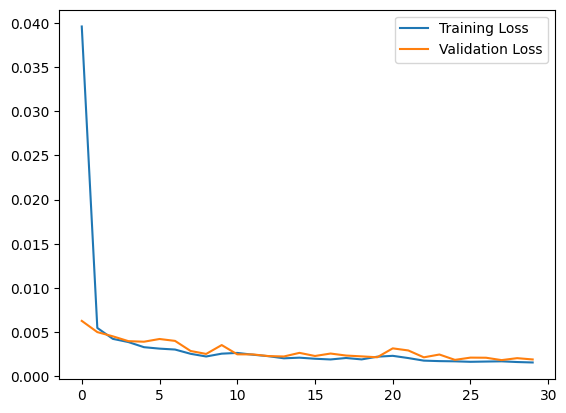

In [ ]:
# Plotting Loss
plt.plot(history_attention.history['loss'], label='Training Loss')
plt.plot(history_attention.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluating the model
r2_attention = predic(X_test, y_test, model_attention)
print(f'R^2 score on test value from LSTM with Attention model {r2_attention}')

8/8 [==============================] - 1s 7ms/step
R^2 score on test value from LSTM with Attention model 0.9622025608099364


#Hybrid

In [ ]:
# Hybrid CNN-LSTM Model
model_hybrid = Sequential()

# CNN layers
model_hybrid.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(70, 1)))
model_hybrid.add(MaxPooling1D(pool_size=2))

# LSTM layer
model_hybrid.add(LSTM(32, return_sequences=True))
model_hybrid.add(Dropout(0.2))

# Flatten for Dense layer
model_hybrid.add(Flatten())

# Dense layers for output
model_hybrid.add(Dense(32, activation='relu'))
model_hybrid.add(Dense(1))

In [ ]:
# Compile the model
model_hybrid.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Model summary
model_hybrid.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 69, 64)            192       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 34, 64)            0         
 g1D)                                                            
                                                                 
 lstm_6 (LSTM)               (None, 34, 32)            12416     
                                                                 
 dropout_9 (Dropout)         (None, 34, 32)            0         
                                                                 
 flatten_1 (Flatten)         (None, 1088)              0         
                                                                 
 dense_15 (Dense)            (None, 32)                34848     
                                                      

In [ ]:
# Training the model
history_hybrid = model_hybrid.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
22/22 [==============================] - 3s 28ms/step - loss: 0.0216 - val_loss: 0.0098
Epoch 2/30
22/22 [==============================] - 0s 9ms/step - loss: 0.0103 - val_loss: 0.0077
Epoch 3/30
22/22 [==============================] - 0s 9ms/step - loss: 0.0078 - val_loss: 0.0061
Epoch 4/30
22/22 [==============================] - 0s 7ms/step - loss: 0.0059 - val_loss: 0.0052
Epoch 5/30
22/22 [==============================] - 0s 6ms/step - loss: 0.0059 - val_loss: 0.0050
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 0.0054 - val_loss: 0.0049
Epoch 7/30
22/22 [==============================] - 0s 8ms/step - loss: 0.0053 - val_loss: 0.0038
Epoch 8/30
22/22 [==============================] - 0s 7ms/step - loss: 0.0047 - val_loss: 0.0038
Epoch 9/30
22/22 [==============================] - 0s 7ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 10/30
22/22 [==============================] - 0s 7ms/step - loss: 0.0041 - val_loss: 0.0035
Epoch 11/30
22/22 

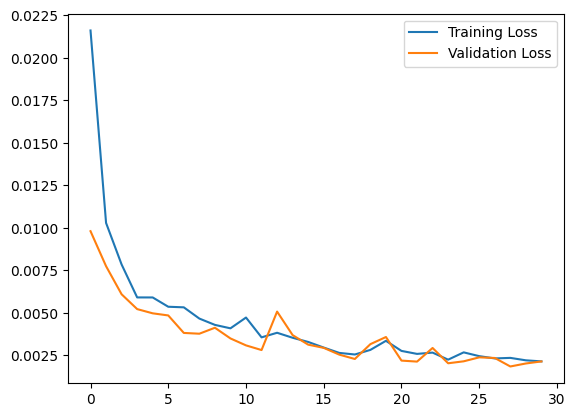

In [ ]:
# Plotting Loss
plt.plot(history_hybrid.history['loss'], label='Training Loss')
plt.plot(history_hybrid.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluating the model
r2_hybrid = predic(X_test, y_test, model_hybrid)
print(f'R^2 score on test value from Hybrid CNN-LSTM model {r2_hybrid}')

8/8 [==============================] - 1s 4ms/step
R^2 score on test value from Hybrid CNN-LSTM model 0.9569058303384915


References:

https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction

# STATISTICAL MODELS FROM NIXTRA LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/SiddantaK/cryptocurrency/master/NFLX.csv')
columns_to_keep = ['Date', 'Close']
df_cl = df[columns_to_keep]
df_cl.head()
df_cl.insert(loc=0,column='ID', value='NETFLIX')
df_cl.head()

,ID,Date,Close
0,NETFLIX,2018-02-05,254.259995
1,NETFLIX,2018-02-06,265.720001
2,NETFLIX,2018-02-07,264.559998
3,NETFLIX,2018-02-08,250.100006
4,NETFLIX,2018-02-09,249.470001


In [ ]:
#!pip install statsforecast

In [ ]:
import os
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.models import SeasonalNaive

In [ ]:
new_column_names = ['unique_id', 'ds', 'y']
df_cl.columns = new_column_names
os.environ['NIXTLA_ID_AS_COL'] = '1'

In [ ]:
df_cl['ds'] = pd.to_datetime(df_cl['ds'], errors='coerce')

<ipython-input-31-73665384c6e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl['ds'] = pd.to_datetime(df_cl['ds'], errors='coerce')


In [ ]:
df_cl.head()
print(type(df_cl.loc[1, 'ds']))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
sf = StatsForecast(
    models=[AutoARIMA(season_length = 12), SeasonalNaive(season_length=24)],
    freq='W', #prediction frequency: 'H' - hourly, D' - daily, 'W' - weekly, 'M'- monthly
)

In [ ]:
sf.fit(df_cl)
sf.predict(h=12, level=[95])

,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95,SeasonalNaive,SeasonalNaive-lo-95,SeasonalNaive-hi-95
unique_id,,,,,,,
NETFLIX,2022-02-06,409.418182,387.803314,431.033051,597.369995,505.365631,689.374390
NETFLIX,2022-02-13,401.725372,371.952423,431.498322,591.150024,499.145660,683.154419
NETFLIX,2022-02-20,401.004730,364.836792,437.172668,567.520020,475.515656,659.524414
NETFLIX,2022-02-27,399.562653,357.973206,441.152069,553.289978,461.285614,645.294373
NETFLIX,2022-03-06,399.095154,352.713593,445.476715,541.059998,449.055634,633.064392
NETFLIX,2022-03-13,400.973450,350.250519,451.696381,539.849976,447.845612,631.854370
NETFLIX,2022-03-20,400.810669,346.089722,455.531616,540.840027,448.835663,632.844421
NETFLIX,2022-03-27,403.786743,345.340607,462.232880,537.219971,445.215607,629.224365
NETFLIX,2022-04-03,405.873047,343.925354,467.820770,519.200012,427.195648,611.204407


In [ ]:
crossvaldation_df = sf.cross_validation(
    df=df_cl,
    h=24,
    step_size=24,
    n_windows=2
)
crossvaldation_df.reset_index(inplace=True)

In [ ]:
crossvaldation_df.head()

,unique_id,ds,cutoff,y,AutoARIMA,SeasonalNaive
0,NETFLIX,2021-03-07,2021-02-28,663.840027,664.247559,671.659973
1,NETFLIX,2021-03-14,2021-02-28,641.900024,665.084473,668.520020
2,NETFLIX,2021-03-21,2021-02-28,617.770020,666.858887,662.919983
3,NETFLIX,2021-03-28,2021-02-28,616.469971,666.574036,674.049988
4,NETFLIX,2021-04-04,2021-02-28,602.130005,667.061768,690.309998


In [ ]:
!pip install utilsforecast

In [ ]:
from utilsforecast.losses import mse
from utilsforecast.evaluation import evaluate

In [ ]:
def evaluate_cross_validation(df, metric):
    models = ['AutoARIMA', 'SeasonalNaive'] # add your models here
    evals = []
    # Calculate loss for every unique_id and cutoff.
    for cutoff in df['cutoff'].unique():
        eval_ = evaluate(df[df['cutoff'] == cutoff], metrics=[metric], models=models)
        evals.append(eval_)
    evals = pd.concat(evals)
    evals = evals.groupby('unique_id').mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

In [ ]:
evaluation_df = evaluate_cross_validation(crossvaldation_df, mse)
evaluation_df.head()

,AutoARIMA,SeasonalNaive,best_model
unique_id,,,
NETFLIX,12407.507812,13180.722656,AutoARIMA


# Importing PyCaret timeseries

#### PyCaret Time Series module is a powerful tool for analyzing and predicting time series data using machine learning and classical statistical techniques. This module enables users to easily perform complex time series forecasting tasks by automating the entire process from data preparation to model deployment. PyCaret Time Series Forecasting module supports a wide range of forecasting methods such as ARIMA, Prophet, and LSTM. It also provides various features to handle missing values, time series decomposition, and data visualizations.



### The module currently is suitable for univariate / multivariate time series forecasting tasks. It comes built-in with preprocessing capabilities and over 30 algorithms comprising of statistical / time-series methods as well as machine learning based models. In addition to the model training, this module has lot of other capabilities such as automated hyperparameter tuning, ensembling, model analysis, model packaging and deployment capabilities.

##### Reference:
- https://pycaret.gitbook.io/docs/
- https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Time%20Series%20Forecasting.ipynb


In [ ]:
# !pip install pycaret

In [ ]:
from pycaret.time_series import *

In [ ]:
# !pip install plotly_express

### Setting

In [ ]:
import plotly_express as px
# %matplotlib inline
import datetime

In [ ]:
# !pip install mlflow

In [ ]:
# help(setup)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
data.drop(columns = ['Adj Close', 'Volume'])

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [ ]:
data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [ ]:
dff = pd.DataFrame(data[['Date','Close']])
dff=dff.reset_index()
dff=dff.drop('index',axis=1)
dff.set_index('Date', inplace=True)
dff = dff.asfreq('D')
dff

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


In [ ]:
experiment_name = setup(data = dff, fh = 90, session_id = 777, log_experiment = 'mlflow', experiment_name = 'AI_Final_Project_Netflix_data', use_gpu = True, numeric_imputation_target='median')

,Description,Value
0,session_id,777
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1461, 1)"
5,Transformed data shape,"(1461, 1)"
6,Transformed train set shape,"(1371, 1)"
7,Transformed test set shape,"(90, 1)"
8,Rows with missing values,30.9%
9,Fold Generator,ExpandingWindowSplitter


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

In [ ]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'all_sps_to_use',
 'approach_type',
 'candidate_sps',
 'data',
 'dataset',
 'dataset_transformed',
 'enforce_exogenous',
 'enforce_pi',
 'exogenous_present',
 'exp_id',
 'exp_name_log',
 'fh',
 'fold_generator',
 'fold_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'index_type',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'model_engines',
 'n_jobs_param',
 'pipeline',
 'primary_sp_to_use',
 'seasonality_present',
 'seed',
 'significant_sps',
 'significant_sps_no_harmonics',
 'strictly_positive',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
# lets access y_train_transformed
get_config('y_train_transformed')

Date
2018-02-05    254.259995
2018-02-06    265.720001
2018-02-07    264.559998
2018-02-08    250.100006
2018-02-09    249.470001
                 ...    
2021-11-02    677.719971
2021-11-03    688.289978
2021-11-04    668.400024
2021-11-05    645.719971
2021-11-06    370.079987
Freq: D, Name: Close, Length: 1371, dtype: float64

### Plotting

In [ ]:
# plot_model(plot = 'ts')

In [ ]:
# plot_model(plot = 'diagnostics')

### Modeling

#### Compare Models
##### This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [ ]:
best = compare_models(sort = 'R2')

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,2.4104,1.8608,33.0018,47.6400,0.0611,0.0618,0.6965,0.4400
arima,ARIMA,2.4021,1.8573,32.8644,47.4836,0.0607,0.0612,0.6952,0.3000
exp_smooth,Exponential Smoothing,2.4206,1.8769,33.1468,48.0698,0.0614,0.0622,0.6919,0.3733
snaive,Seasonal Naive Forecaster,2.5380,1.8902,34.7659,48.4927,0.0647,0.0662,0.6874,0.1500
stlf,STLF,2.5089,1.9063,34.3154,48.6909,0.0640,0.0643,0.6780,0.2067
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,2.9502,2.0394,40.4113,52.3085,0.0782,0.0798,0.6370,2.8600
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,2.9963,2.0628,40.9921,52.8575,0.0765,0.0797,0.6264,4.2367
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,3.4360,2.2459,47.1145,57.7498,0.0934,0.0952,0.5546,2.8867
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,3.5294,2.3614,48.4333,60.7299,0.0940,0.0967,0.4881,5.7233
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,3.7527,2.4474,51.4294,62.7661,0.1049,0.1055,0.4754,3.0800


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [ ]:
# check_stats(estimator = best)

In [ ]:
print(best)

AutoETS(seasonal='mul', sp=7, trend='add')


In [ ]:
#compare only the time series models

compare_ts_models = compare_models(include = ['rf_cds_dt', 'arima', 'lightgbm_cds_dt', 'naive', 'et_cds_dt', 'grand_means', 'polytrend'])

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,2.4021,1.8573,32.8644,47.4836,0.0607,0.0612,0.6952,0.2733
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,3.5294,2.3614,48.4333,60.7299,0.0940,0.0967,0.4881,5.7967
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,4.2337,2.7162,58.0339,69.6923,0.1186,0.1193,0.3494,5.6133
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,4.4420,2.7630,60.8585,70.7564,0.1274,0.1261,0.3233,3.6400
polytrend,Polynomial Trend Forecaster,6.3452,3.5798,86.8005,91.3770,0.1793,0.1811,-0.1532,0.0767
naive,Naive Forecaster,7.3475,4.9686,100.5897,127.1524,0.2034,0.2105,-1.1630,0.1033
grand_means,Grand Means Forecaster,8.7640,5.6017,119.9151,142.8801,0.2181,0.2576,-1.8708,0.1400


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
compare_ts_models_results = pull()
compare_ts_models_results

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,2.4021,1.8573,32.8644,47.4836,0.0607,0.0612,0.6952,0.2733
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,3.5294,2.3614,48.4333,60.7299,0.094,0.0967,0.4881,5.7967
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,4.2337,2.7162,58.0339,69.6923,0.1186,0.1193,0.3494,5.6133
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,4.442,2.763,60.8585,70.7564,0.1274,0.1261,0.3233,3.6400
polytrend,Polynomial Trend Forecaster,6.3452,3.5798,86.8005,91.377,0.1793,0.1811,-0.1532,0.0767
naive,Naive Forecaster,7.3475,4.9686,100.5897,127.1524,0.2034,0.2105,-1.163,0.1033
grand_means,Grand Means Forecaster,8.764,5.6017,119.9151,142.8801,0.2181,0.2576,-1.8708,0.1400


In [ ]:
# By default compare_models return the single best performing model based on the metric defined in the sort parameter. Let's change our code to return 5 top models based on r2.

best_r2_score_models = compare_models(sort = 'R2', n_select = 5)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,2.4104,1.8608,33.0018,47.6400,0.0611,0.0618,0.6965,0.4733
arima,ARIMA,2.4021,1.8573,32.8644,47.4836,0.0607,0.0612,0.6952,0.2867
exp_smooth,Exponential Smoothing,2.4206,1.8769,33.1468,48.0698,0.0614,0.0622,0.6919,0.4900
snaive,Seasonal Naive Forecaster,2.5380,1.8902,34.7659,48.4927,0.0647,0.0662,0.6874,0.1533
stlf,STLF,2.5089,1.9063,34.3154,48.6909,0.0640,0.0643,0.6780,0.1467
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,2.9502,2.0394,40.4113,52.3085,0.0782,0.0798,0.6370,3.1433
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,2.9963,2.0628,40.9921,52.8575,0.0765,0.0797,0.6264,4.3433
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,3.4360,2.2459,47.1145,57.7498,0.0934,0.0952,0.5546,3.1367
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,3.5294,2.3614,48.4333,60.7299,0.0940,0.0967,0.4881,6.3200
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,3.7527,2.4474,51.4294,62.7661,0.1049,0.1055,0.4754,3.1700


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

In [ ]:
#listing the top 5 models by R2 scores
best_r2_score_models

[AutoETS(seasonal='mul', sp=7, trend='add'),
 ARIMA(seasonal_order=(0, 1, 0, 7)),
 ExponentialSmoothing(seasonal='mul', sp=7, trend='add'),
 NaiveForecaster(sp=7),
 STLForecaster(sp=7)]

In [ ]:
# residuals plot
plot_model(best, plot = 'residuals')

In [ ]:
plot_model(best, plot = 'diagnostics')

In [ ]:
# plot_model(best, plot = 'insample')